<a href="https://colab.research.google.com/github/balanireekshan/Data-Science-Intern-Assignment/blob/main/Bala_Nireekshan_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Quick look at the data
print(customers.head())
print('\n', products.head())
print('\n', transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3   

In [4]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [5]:
# Merging datasets for combined analysis
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [6]:
# 1. General Information
print("Customers Dataset:\n", customers.info())
print("Products Dataset:\n", products.info())
print("Transactions Dataset:\n", transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
Customers Dataset:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
Products Dataset:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data col

In [7]:
# 2. Missing Values
print("Missing values:\n", data.isnull().sum())

Missing values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [8]:
# 3. Descriptive Statistics
print("Descriptive Statistics:\n", data.describe())

Descriptive Statistics:
                      TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              

In [9]:
# 4. Top-selling Products
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Best-Selling Products:\n", top_products)

Top 10 Best-Selling Products:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


In [10]:
# 5. Revenue by Region
revenue_by_region = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Region:\n", revenue_by_region)

Revenue by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [11]:
# 6. Signup Trends
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
print("Customer Signup Trends:\n", signup_trends)

Customer Signup Trends:
 SignupYear
2022    64
2023    57
2024    79
Name: count, dtype: int64


In [12]:
# 7. Monthly Revenue Trend
monthly_revenue = data.groupby(data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print("Monthly Revenue Trend:\n", monthly_revenue)

Monthly Revenue Trend:
 TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


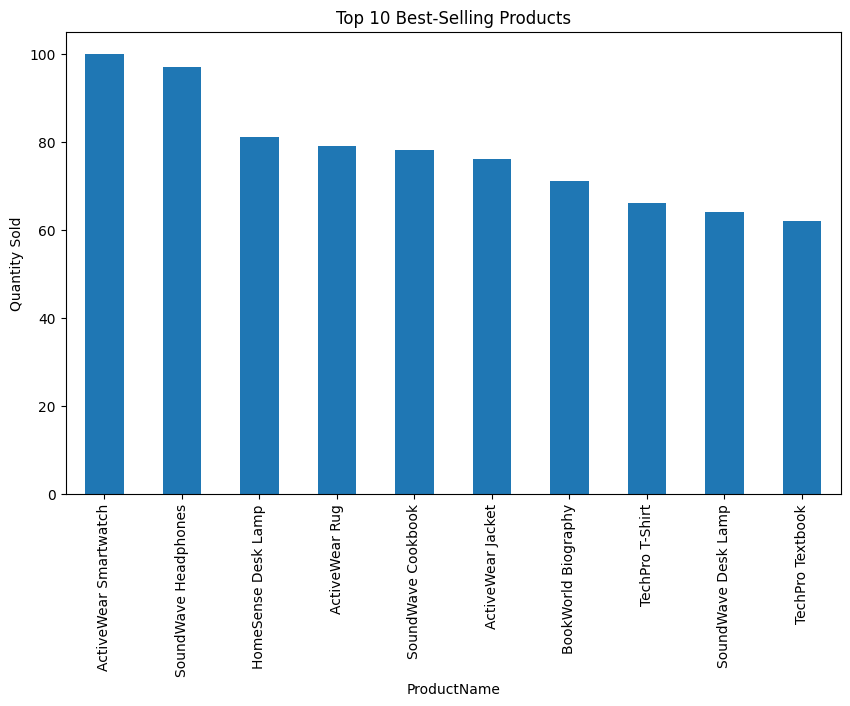

In [13]:
# 8. Visualization
# Top 10 Products
top_products.plot(kind='bar', title="Top 10 Best-Selling Products", figsize=(10, 6))
plt.ylabel("Quantity Sold")
plt.show()

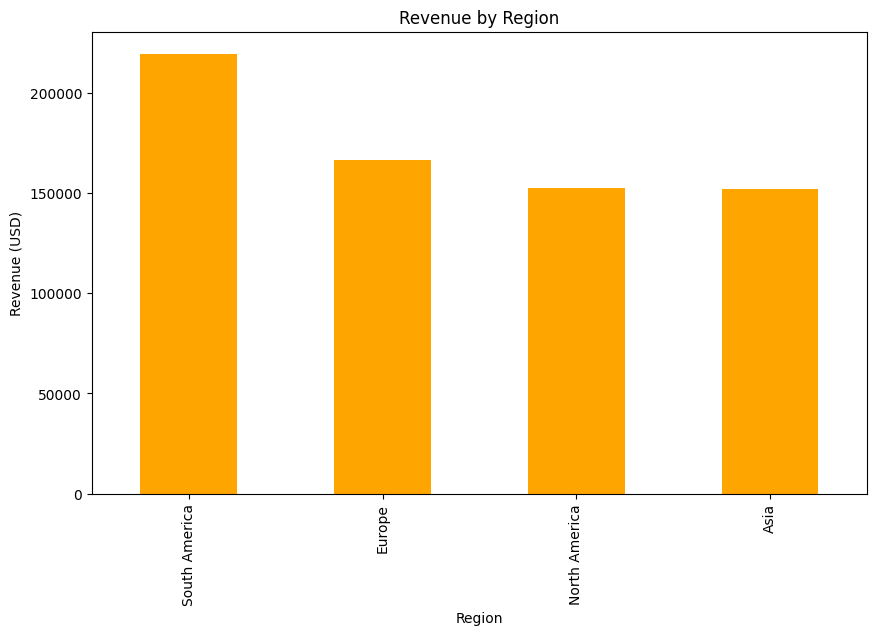

In [14]:
# Revenue by Region
revenue_by_region.plot(kind='bar', title="Revenue by Region", figsize=(10, 6), color='orange')
plt.ylabel("Revenue (USD)")
plt.show()

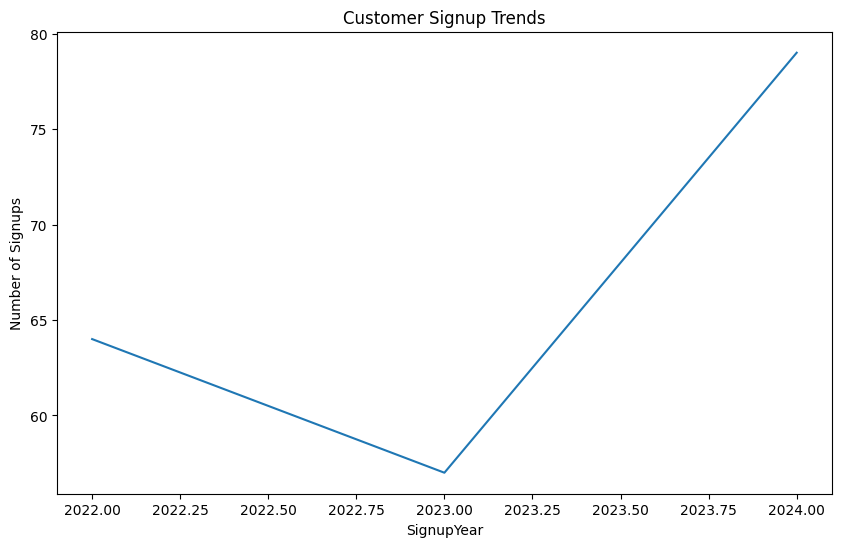

In [15]:
# Signup Trends
signup_trends.plot(kind='line', title="Customer Signup Trends", figsize=(10, 6))
plt.ylabel("Number of Signups")
plt.show()

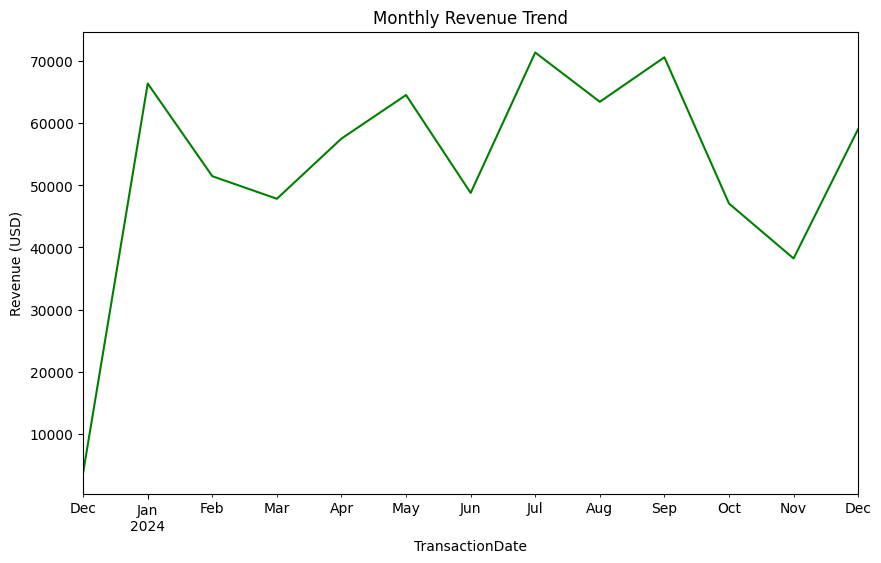

In [16]:
# Monthly Revenue Trend
monthly_revenue.plot(kind='line', title="Monthly Revenue Trend", figsize=(10, 6), color='green')
plt.ylabel("Revenue (USD)")
plt.show()